In [11]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from matplotlib import pyplot as plt
from tqdm import tqdm
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [70]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
import mlrose_hiive
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, FlipFlopGenerator, ContinuousPeaksGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner, MIMICRunner
from mlrose_hiive import GeomDecay, ArithDecay, ExpDecay

# Data Preparation

In [8]:
#Loads the Breast Cancer Wisconsin (Diagnostic) Data Set
#returns X (data) and y (labels)

data = pd.read_csv('./data/breastcancer.csv')

# y includes our labels and x includes our features
y = data.diagnosis  # malignant (M) or benign (B)
# The column "Unnamed: 32" feature includes NaN so drop it from the data. Also drop "id" as it is not a feature and
# "diagnosis" as it is the label
to_drop = ['Unnamed: 32', 'id', 'diagnosis']
X = data.drop(to_drop, axis=1)

# Convert string labels to numerical values
y = y.values
y[y == 'M'] = 1
y[y == 'B'] = 0
y = y.astype(int)

print('Total number of examples in the dataset: %d' % X.shape[0])
print('Fraction of positive examples: %.2f%%' % (y[y == 1].shape[0]/y.shape[0]*100.0))

Total number of examples in the dataset: 569
Fraction of positive examples: 37.26%


In [12]:
# Standardize data
X = preprocessing.scale(X)

# Split into training and test data. Use random_state to get the same results in every run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=18)

# Neural Network

In [37]:
# list to store different models
models = []

class ExperimentModel():
    def __init__(self, name, estimator):
        self.name = name
        self.estimator = estimator
        self.train_sizes = None
        self.train_scores = None
        self.test_scores  = None
        self.fit_times = None
        self.score_times = None
        self.train_acc = None
        self.test_acc = None

In [14]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=7, max_iter=1)
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1, random_state=7)

In [24]:
nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,3], activation = 'relu', algorithm = 'gradient_descent', 
                                      max_iters = 100, bias = True, is_classifier = True, learning_rate = 0.1, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100, random_state = 3, 
                                      curve=True, pop_size=5, mutation_prob=0.3)

# Randomized hill climbing

In [20]:
random_hill_climb_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,3], activation = 'relu', 
                                                     algorithm = 'random_hill_climb', max_iters = 100, bias = True, 
                                                     is_classifier = True, learning_rate = 0.1, early_stopping = True, 
                                                     clip_max = 5, max_attempts = 100, random_state = 3, curve=True, 
                                                     pop_size=5, mutation_prob=0.3)

# Simulated Annealing

In [22]:
simulated_annealing_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,3], activation = 'relu', 
                                                     algorithm = 'simulated_annealing', max_iters = 100, bias = True, 
                                                     is_classifier = True, learning_rate = 0.1, early_stopping = True, 
                                                     clip_max = 5, max_attempts = 100, random_state = 3, curve=True, 
                                                     pop_size=5, mutation_prob=0.3)

# A Genetic Algorithm

In [21]:
gentic_alogrithm_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,3], activation = 'relu', 
                                                     algorithm = 'genetic_alg', max_iters = 100, bias = True, 
                                                     is_classifier = True, learning_rate = 0.1, early_stopping = True, 
                                                     clip_max = 5, max_attempts = 100, random_state = 3, curve=True, 
                                                     pop_size=5, mutation_prob=0.3)

# MIMIC

In [23]:
mimic_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [10,3], activation = 'relu', algorithm = 'MIMIC', 
                                         max_iters = 100, bias = True, is_classifier = True, learning_rate = 0.1, 
                                         early_stopping = True, clip_max = 5, max_attempts = 100, random_state = 3, 
                                         curve=True, pop_size=5, mutation_prob=0.3)

# Plotting curves

In [31]:
def plot_learning_curve(estimator, X, y):
    cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=18)
    scoring = make_scorer(lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'))
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(estimator, 
                                                                          X, 
                                                                          y, 
                                                                          scoring=scoring, 
                                                                          cv=cv, 
                                                                          n_jobs=4, 
                                                                          shuffle=True, 
                                                                          return_times=True,
                                                                         )
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)
    
    return train_sizes, train_scores, test_scores, fit_times, score_times

In [38]:
estimators = [
    ("Neural Network", nn_model),
    ("Randomized Hill Climbing", random_hill_climb_model),
    ("Simulated Annealing", simulated_annealing_model),
    ("Genetic Algorithm", gentic_alogrithm_model),
    ("MIMIC", mimic_model)
]

for estimator in tqdm(estimators):
    model = ExperimentModel(estimator[0], estimator[1])
    model.train_sizes, model.train_scores, model.test_scores, model.fit_times, model.score_times = plot_learning_curve(estimator[1], X, y)
    models.append(model)
    print("Completed {}".format(estimator[0]))

 20%|█████████                                    | 1/5 [00:02<00:08,  2.04s/it]

Completed Neural Network


 40%|██████████████████                           | 2/5 [00:02<00:03,  1.09s/it]

Completed Randomized Hill Climbing


 60%|███████████████████████████                  | 3/5 [00:03<00:01,  1.17it/s]

Completed Simulated Annealing


100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.07s/it]

Completed Genetic Algorithm
Completed MIMIC


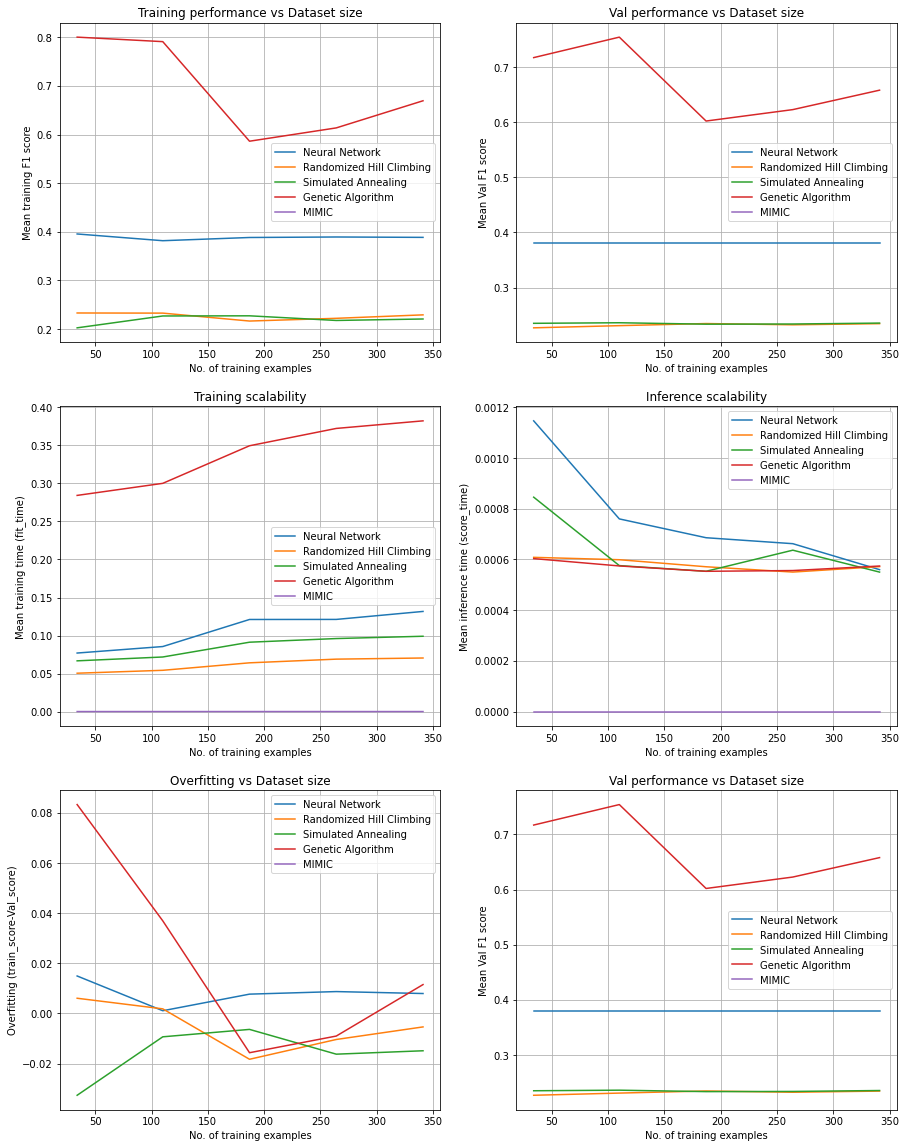

In [47]:
def generate_plots(models):
    fig, axes = plt.subplots(3, 2, figsize=(15, 20))

    for model in models:
        axes[0, 0].plot(model.train_sizes, np.mean(model.train_scores, axis=1), label=model.name)
        axes[0, 1].plot(model.train_sizes, np.mean(model.test_scores, axis=1), label=model.name)
        axes[1, 0].plot(model.train_sizes, np.mean(model.fit_times, axis=1), label=model.name)
        axes[1, 1].plot(model.train_sizes, np.mean(model.score_times, axis=1), label=model.name)
        axes[2, 0].plot(model.train_sizes, np.mean(model.train_scores, axis=1)-np.mean(model.test_scores, axis=1), label=model.name)
        axes[2, 1].plot(model.train_sizes, np.mean(model.test_scores, axis=1), label=model.name)
        
    #training performance vs no. samVal
    axes[0, 0].grid()
    axes[0, 0].legend(loc="best")
    axes[0, 0].set_xlabel("No. of training examples")
    axes[0, 0].set_ylabel("Mean training F1 score")
    axes[0, 0].set_title("Training performance vs Dataset size")

    #test performance vs no. samples
    axes[0, 1].grid()
    axes[0, 1].legend(loc="best")
    axes[0, 1].set_xlabel("No. of training examples")
    axes[0, 1].set_ylabel("Mean Val F1 score")
    axes[0, 1].set_title("Val performance vs Dataset size")

    #training time vs no. samples
    axes[1, 0].grid()
    axes[1, 0].legend(loc="best")
    axes[1, 0].set_xlabel("No. of training examples")
    axes[1, 0].set_ylabel("Mean training time (fit_time)")
    axes[1, 0].set_title("Training scalability")
    
    #inference time vs no. samples
    axes[1, 1].grid()
    axes[1, 1].legend(loc="best")
    axes[1, 1].set_xlabel("No. of training examples")
    axes[1, 1].set_ylabel("Mean inference time (score_time)")
    axes[1, 1].set_title("Inference scalability")
    
    #overfitting vs no. samples
    axes[2, 0].grid()
    axes[2, 0].legend(loc="best")
    axes[2, 0].set_xlabel("No. of training examples")
    axes[2, 0].set_ylabel("Overfitting (train_score-Val_score)")
    axes[2, 0].set_title("Overfitting vs Dataset size")

    axes[2, 1].grid()
    axes[2, 1].legend(loc="best")
    axes[2, 1].set_xlabel("No. of training examples")
    axes[2, 1].set_ylabel("Mean Val F1 score")
    axes[2, 1].set_title("Val performance vs Dataset size")

generate_plots(models)

In [73]:
models1 = []
train_acc = []
train_model = []
test_acc = []

for estimator in tqdm(estimators):
    if estimator[0] != "MIMIC":
        model = ExperimentModel(estimator[0], estimator[1])
        start = time.time()
        model = estimator[1].fit(X_train, y_train)
        model.train_sizes, model.train_scores, model.test_scores, model.fit_times, model.score_times = plot_learning_curve(estimator[1], X, y)

        # Predict labels for train set and assess accuracy
        y_train_pred = model.predict(X_train)
        model.train_acc = accuracy_score(y_train, y_train_pred)
        train_acc.append(model.train_acc)
        # Predict labels for test set and assess accuracy
        y_test_pred = model.predict(X_test)
        model.test_acc = accuracy_score(y_test, y_test_pred)
        test_acc.append(model.test_acc)
        end = time.time()
        models1.append(model)
        print("Completed {}".format(estimator[0]), end-start)
        train_model.append(estimator[0])
 
        print("TRAINING")
        print(classification_report(y_train, y_train_pred))
        print("TESTING")
        print(classification_report(y_test, y_test_pred))

 20%|█████████                                    | 1/5 [00:00<00:03,  1.16it/s]

Completed Neural Network 0.8574190139770508
TRAINING
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       218
           1       0.00      0.00      0.00       123

    accuracy                           0.64       341
   macro avg       0.32      0.50      0.39       341
weighted avg       0.41      0.64      0.50       341

TESTING
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       139
           1       0.00      0.00      0.00        89

    accuracy                           0.61       228
   macro avg       0.30      0.50      0.38       228
weighted avg       0.37      0.61      0.46       228



 40%|██████████████████                           | 2/5 [00:01<00:02,  1.48it/s]

Completed Randomized Hill Climbing 0.5419459342956543
TRAINING
              precision    recall  f1-score   support

           0       0.05      0.01      0.02       218
           1       0.28      0.68      0.40       123

    accuracy                           0.25       341
   macro avg       0.16      0.35      0.21       341
weighted avg       0.13      0.25      0.15       341

TESTING
              precision    recall  f1-score   support

           0       0.19      0.02      0.04       139
           1       0.36      0.85      0.50        89

    accuracy                           0.35       228
   macro avg       0.27      0.44      0.27       228
weighted avg       0.25      0.35      0.22       228



 60%|███████████████████████████                  | 3/5 [00:02<00:01,  1.40it/s]

Completed Simulated Annealing 0.751835823059082
TRAINING
              precision    recall  f1-score   support

           0       0.03      0.00      0.01       218
           1       0.29      0.71      0.41       123

    accuracy                           0.26       341
   macro avg       0.16      0.36      0.21       341
weighted avg       0.12      0.26      0.15       341

TESTING
              precision    recall  f1-score   support

           0       0.07      0.01      0.01       139
           1       0.36      0.85      0.50        89

    accuracy                           0.34       228
   macro avg       0.21      0.43      0.26       228
weighted avg       0.18      0.34      0.20       228



100%|█████████████████████████████████████████████| 5/5 [00:04<00:00,  1.02it/s]

Completed Genetic Algorithm 2.7466139793395996
TRAINING
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       218
           1       0.81      0.89      0.85       123

    accuracy                           0.89       341
   macro avg       0.87      0.89      0.88       341
weighted avg       0.89      0.89      0.89       341

TESTING
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       139
           1       0.81      0.87      0.84        89

    accuracy                           0.87       228
   macro avg       0.86      0.87      0.86       228
weighted avg       0.87      0.87      0.87       228



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


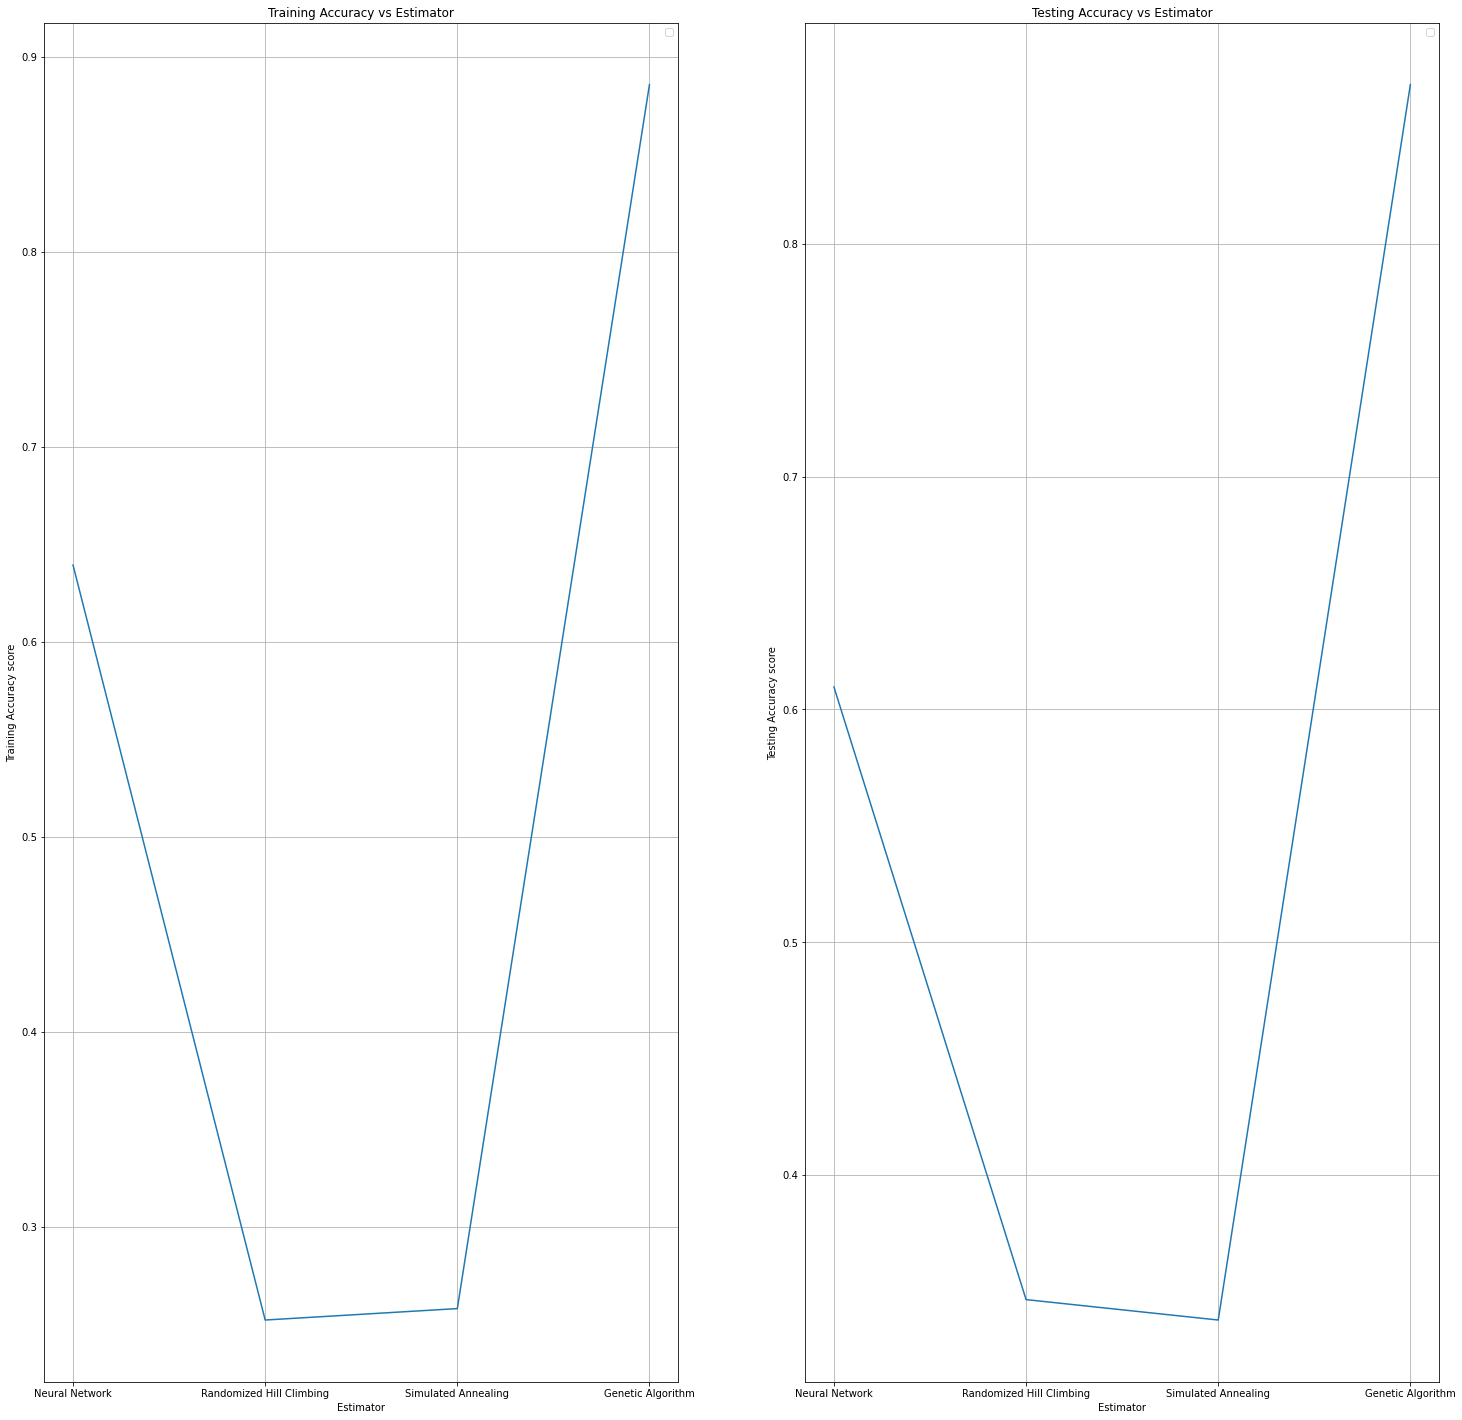

In [67]:
def generate_accuracy_plots(models, train_acc, test_acc, train_model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 25))
    ax1.plot(train_model, train_acc)
    ax2.plot(train_model, test_acc)
        
    #training accuracy vs no. samples
    ax1.grid()
    ax1.legend(loc="best")
    ax1.set_ylabel("Training Accuracy score")
    ax1.set_xlabel("Estimator")
    ax1.set_title("Training Accuracy vs Estimator")

    #test accuracy vs no. samples
    ax2.grid()
    ax2.legend(loc="best")
    ax2.set_ylabel("Testing Accuracy score")
    ax2.set_xlabel("Estimator")
    ax2.set_title("Testing Accuracy vs Estimator")

generate_accuracy_plots(models1, train_acc, test_acc, train_model)

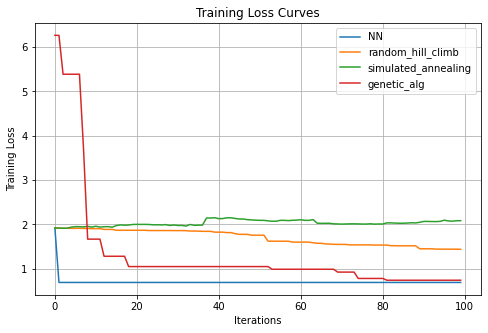

In [68]:
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(-1*models1[0].fitness_curve, label="NN")
plt.plot(models1[1].fitness_curve[:, 0], label=models1[1].algorithm)
plt.plot(models1[2].fitness_curve[:,0], label=models1[2].algorithm)
plt.plot(models1[3].fitness_curve[:,0], label=models1[3].algorithm)

ax.set_title('Training Loss Curves')
ax.set_ylabel('Training Loss')
ax.set_xlabel('Iterations')
ax.grid()

ax.legend()